In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import shap
shap.initjs()

In [2]:
df = pd.read_csv("Bank_Customer_Churn_Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [164]:
df.describe()

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Preprocessing

In [5]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
label_encoder = LabelEncoder()

In [8]:
df['gender'] = label_encoder.fit_transform(df['gender'])

In [9]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [10]:
dummies =pd.get_dummies(df['country'])
df = df.drop('country', axis=1)

In [11]:
encoded_Data = pd.concat([df,dummies],axis=1)
encoded_Data.head()

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [12]:
cols_for_scaling = ['credit_score','age','tenure','balance','products_number','estimated_salary']


In [13]:
cols_for_sc = encoded_Data[cols_for_scaling]


In [14]:
scaler = StandardScaler()
X1 = scaler.fit_transform(cols_for_sc)

In [15]:
encoded_Data['credit_score'] = X1[:,0]
encoded_Data['age'] = X1[:,1]
encoded_Data['tenure'] = X1[:,2]
encoded_Data['balance'] = X1[:,3]
encoded_Data['products_number'] = X1[:,4]
encoded_Data['estimated_salary'] = X1[:,5]

In [16]:
encoded_Data.head()

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain
0,15634602,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,True,False,False
1,15647311,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,False,False,True
2,15619304,-1.536794,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,True,False,False
3,15701354,0.501521,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,True,False,False
4,15737888,2.063884,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,False,False,True


## SMOTE Technique for Class Imbalance

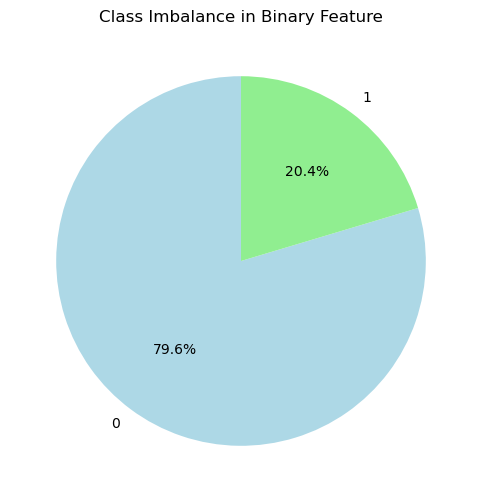

In [17]:
class_counts = df['churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Class Imbalance in Binary Feature')
plt.show()


In [18]:
X = encoded_Data.drop('churn', axis=1)
y = encoded_Data['churn']

In [19]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [20]:
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['churn'] = y_resampled

In [21]:
print("Original dataset class distribution:\n", y.value_counts())
print("\nResampled dataset class distribution:\n", y_resampled.value_counts())

Original dataset class distribution:
 churn
0    7963
1    2037
Name: count, dtype: int64

Resampled dataset class distribution:
 churn
1    7963
0    7963
Name: count, dtype: int64


In [24]:
df_resampled.head()

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,France,Germany,Spain,churn
0,15634602,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,True,False,False,1
1,15647311,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,False,False,True,0
2,15619304,-1.536794,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,True,False,False,1
3,15701354,0.501521,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,True,False,False,0
4,15737888,2.063884,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,False,False,True,0


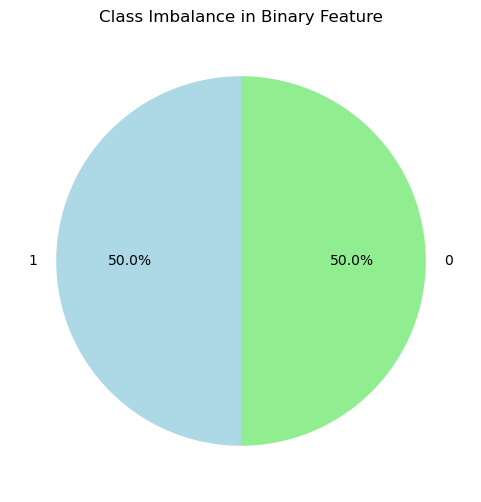

In [25]:
class_counts = df_resampled['churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Class Imbalance in Binary Feature')
plt.show()

# Model Training

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,roc_curve,roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree, export_text
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

In [55]:
name = []
accuracy = []
precision = []
recall = []
f1 = []

In [57]:
X = df_resampled.drop(['customer_id','churn'], axis=1)
y = df_resampled['churn']

In [58]:
# X = df_resampled[['age', 'tenure', 'active_member', 'gender', 'products_number']]
# y = df_resampled['churn']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
print(X_train.shape)

(12740, 12)


## Logistic Regression

In [61]:
model_lr = LogisticRegression(penalty='l2', C=1)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

In [62]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_lr*100,precision_lr*100, recall_lr*100, f1_lr*100]}
df_lr = pd.DataFrame(measure)
df_lr

,Metric,Score
0,Accuracy,83.207784
1,Precision,85.347222
2,Recall,79.137154
3,F1 Score,82.124958


In [63]:
name.append('Logistic Regression')
accuracy.append(accuracy_lr)
precision.append(f1_lr)
recall.append(precision_lr)
f1.append(recall_lr)

## Random Forest

In [64]:
model_rf = RandomForestClassifier(max_depth=20,random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)


In [65]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_rf*100,precision_rf*100, recall_rf*100, f1_rf*100]}
df_rf = pd.DataFrame(measure)
df_rf

,Metric,Score
0,Accuracy,90.332706
1,Precision,92.203390
2,Recall,87.572440
3,F1 Score,89.828269


In [66]:
name.append('Random Forest')
accuracy.append(accuracy_rf)
precision.append(f1_rf)
recall.append(precision_rf)
f1.append(recall_rf)

## KNN 

In [67]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)


In [68]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_knn*100,precision_knn*100, recall_knn*100, f1_knn*100]}
df_knn = pd.DataFrame(measure)
df_knn

,Metric,Score
0,Accuracy,86.001255
1,Precision,85.458040
2,Recall,85.898261
3,F1 Score,85.677585


In [69]:
name.append('KNN')
accuracy.append(accuracy_knn)
precision.append(f1_knn)
recall.append(precision_knn)
f1.append(recall_knn)

## Gaussian NB 

In [70]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_pred_gnb = model_gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)

In [71]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_gnb*100,precision_gnb*100, recall_gnb*100, f1_gnb*100]}
df_gnb = pd.DataFrame(measure)
df_gnb

,Metric,Score
0,Accuracy,82.140615
1,Precision,81.906615
2,Recall,81.326465
3,F1 Score,81.615509


In [72]:
name.append('GaussianNB')
accuracy.append(accuracy_gnb)
precision.append(f1_gnb)
recall.append(precision_gnb)
f1.append(recall_gnb)

## SVC 

In [73]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)

In [74]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_svc*100,precision_svc*100, recall_svc*100, f1_svc*100]}
df_svc = pd.DataFrame(measure)
df_svc

,Metric,Score
0,Accuracy,88.041431
1,Precision,91.036415
2,Recall,83.708950
3,F1 Score,87.219054


In [75]:
name.append('SVC')
accuracy.append(accuracy_svc)
precision.append(f1_svc)
recall.append(precision_svc)
f1.append(recall_svc)

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


## Decision Tree

In [77]:
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

dt_grid = GridSearchCV(dt, param_grid, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

y_pred_dt = best_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)


In [78]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_dt*100,precision_dt*100, recall_dt*100, f1_dt*100]}
df_dt = pd.DataFrame(measure)
df_dt

,Metric,Score
0,Accuracy,86.817326
1,Precision,88.148148
2,Recall,84.288474
3,F1 Score,86.175115


In [50]:
name.append('Decision Tree')
accuracy.append(accuracy_dt)
precision.append(f1_dt)
recall.append(precision_dt)
f1.append(recall_dt)

In [79]:
print(name)
print(accuracy)
print(precision)
print(recall)
print(f1)

['Logistic Regression', 'Random Forest', 'KNN', 'GaussianNB', 'SVC']
[0.8320778405524168, 0.9033270558694287, 0.8600125549278091, 0.8214061519146265, 0.8804143126177024]
[0.8212495823588372, 0.8982826948480845, 0.8567758509955041, 0.8161550888529886, 0.8721905400872191]
[0.8534722222222222, 0.9220338983050848, 0.8545803971812941, 0.8190661478599222, 0.9103641456582633]
[0.7913715389568577, 0.875724404378622, 0.8589826142949131, 0.8132646490663232, 0.8370895041854475]


# ANN

In [52]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (you can adjust epochs, batch_size, etc.)
model.fit(X_train, y_train, epochs=150, batch_size=16, validation_split=0.3)

# Evaluate the neural network
_, accuracy_nn = model.evaluate(X_test, y_test)
print("Accuracy : ",accuracy_nn)




Epoch 1/150


558/558 [==============================] - 5s 5ms/step - loss: 0.3897 - accuracy: 0.8269 - val_loss: 0.3384 - val_accuracy: 0.8446
Epoch 2/150
558/558 [==============================] - 4s 6ms/step - loss: 0.3143 - accuracy: 0.8608 - val_loss: 0.3209 - val_accuracy: 0.8543
Epoch 3/150
558/558 [==============================] - 4s 7ms/step - loss: 0.2995 - accuracy: 0.8666 - val_loss: 0.3135 - val_accuracy: 0.8558
Epoch 4/150
558/558 [==============================] - 4s 7ms/step - loss: 0.2939 - accuracy: 0.8695 - val_loss: 0.3096 - val_accuracy: 0.8509
Epoch 5/150
558/558 [==============================] - 3s 5ms/step - loss: 0.2856 - accuracy: 0.8726 - val_loss: 0.3251 - val_accuracy: 0.8480
Epoch 6/150
558/558 [==============================] - 1s 2ms/step - loss: 0.2825 - accuracy: 0.8752 - val_loss: 0.3067 - val_accuracy: 0.8598
Epoch 7/150
558/558 [==============================] - 1s 1ms/step - loss: 0.2762 - accuracy: 0.8796 - val_loss: 0.3045 - val_accuracy: 0

Epoch 107/150
558/558 [==============================] - 1s 1ms/step - loss: 0.1183 - accuracy: 0.9499 - val_loss: 0.4883 - val_accuracy: 0.8642
Epoch 108/150
558/558 [==============================] - 1s 1ms/step - loss: 0.1113 - accuracy: 0.9544 - val_loss: 0.4632 - val_accuracy: 0.8679
Epoch 109/150
558/558 [==============================] - 1s 2ms/step - loss: 0.1112 - accuracy: 0.9544 - val_loss: 0.4623 - val_accuracy: 0.8684
Epoch 110/150
558/558 [==============================] - 1s 1ms/step - loss: 0.1073 - accuracy: 0.9578 - val_loss: 0.4885 - val_accuracy: 0.8639
Epoch 111/150
558/558 [==============================] - 1s 1ms/step - loss: 0.1113 - accuracy: 0.9546 - val_loss: 0.4753 - val_accuracy: 0.8679
Epoch 112/150
558/558 [==============================] - 1s 1ms/step - loss: 0.1081 - accuracy: 0.9572 - val_loss: 0.4811 - val_accuracy: 0.8658
Epoch 113/150
558/558 [==============================] - 1s 1ms/step - loss: 0.1086 - accuracy: 0.9535 - val_loss: 0.4923 - val_ac

In [53]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_nn = model.predict(X_test)

y_pred_binary = (y_pred_nn > 0.5).astype(int)

precision_nn = precision_score(y_test, y_pred_binary)
recall_nn = recall_score(y_test, y_pred_binary)
f1_nn = f1_score(y_test, y_pred_binary)

print("Precision: ", precision_nn)
print("Recall: ", recall_nn)
print("F1 Score: ", f1_nn)


100/100 [==============================] - 0s 768us/step
Precision:  0.874025974025974
Recall:  0.866709594333548
F1 Score:  0.8703524086647267


In [54]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_nn*100,precision_nn*100, recall_nn*100, f1_nn*100]}
df_nn = pd.DataFrame(measure)
df_nn

,Metric,Score
0,Accuracy,87.413687
1,Precision,87.402597
2,Recall,86.670959
3,F1 Score,87.035241


In [55]:
name.append('Neural Network')
accuracy.append(accuracy_nn)
precision.append(f1_nn)
recall.append(precision_nn)
f1.append(recall_nn)

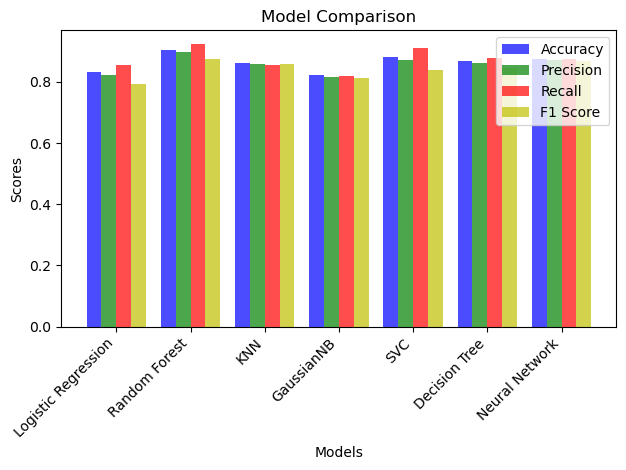

In [56]:
import matplotlib.pyplot as plt
import numpy as np

bar_width = 0.2

index = np.arange(len(name))

fig, ax = plt.subplots()

plt.bar(index, accuracy, bar_width, label='Accuracy', color='b', alpha=0.7)
plt.bar(index + bar_width, precision, bar_width, label='Precision', color='g', alpha=0.7)
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color='r', alpha=0.7)
plt.bar(index + 3 * bar_width, f1, bar_width, label='F1 Score', color='y', alpha=0.7)

ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(name, rotation=45, ha='right')

plt.legend()

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison')

plt.tight_layout()
plt.show()

In [57]:
from xgboost import XGBClassifier

model_bin = XGBClassifier(objective='binary:logistic')
model_bin.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
explainer = shap.Explainer(model_bin)
shap_values_bin = explainer(X)

print(shap_values_bin.shape)

(15926, 12)


In [59]:
print(shap_values_bin.shape)  # To inspect the dimensions

(15926, 12)


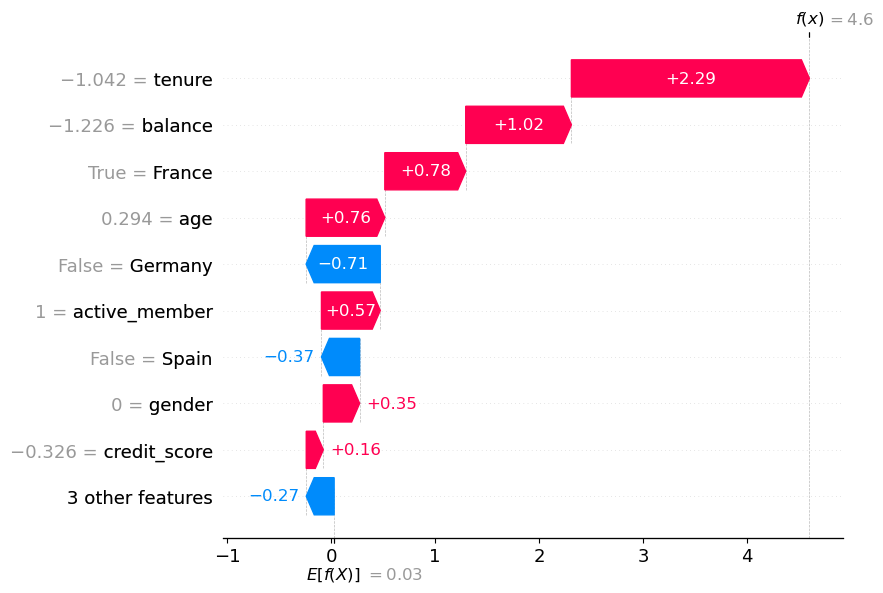

In [60]:
shap.plots.waterfall(shap_values_bin[0])

In [61]:
shap.plots.force(shap_values_bin[0], link="logit")

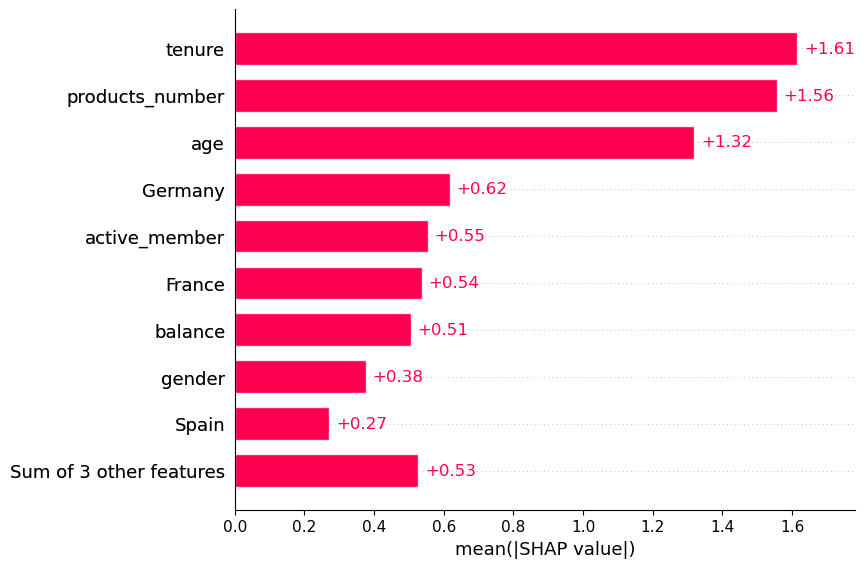

In [62]:
shap.plots.bar(shap_values_bin)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")


# Bagging

In [64]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)


C:\Users\Kush\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[6330    0]
 [   0 6410]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    6330.0  6410.0       1.0    12740.0       12740.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[1474  159]
 [ 190 1363]]
ACCURACY SCORE:
0.8905
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.885817     0.895532  0.890458     0.890675      0.890553
recall        0.902633     0.877656  0.890458     0.890145      0.890458
f1-score      0.894146     0.886504  0.890458     0.890325      0.890421
support    1633.000000  1553.000000  0.890458  3186.000000   3186.000000


In [65]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[6330    0]
 [   0 6410]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    6330.0  6410.0       1.0    12740.0       12740.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[1514  119]
 [ 193 1360]]
ACCURACY SCORE:
0.9021
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.886936     0.919540  0.902072     0.903238      0.902829
recall        0.927128     0.875724  0.902072     0.901426      0.902072
f1-score      0.906587     0.897098  0.902072     0.901842      0.901961
support    1633.000000  1553.000000  0.902072  3186.000000   3186.000000


In [66]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}


In [67]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[6330    0]
 [   0 6410]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    6330.0  6410.0       1.0    12740.0       12740.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[1499  134]
 [ 203 1350]]
ACCURACY SCORE:
0.8942
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.880729     0.909704  0.894225     0.895216      0.894852
recall        0.917942     0.869285  0.894225     0.893614      0.894225
f1-score      0.898951     0.889035  0.894225     0.893993      0.894117
support    1633.000000  1553.000000  0.894225  3186.000000   3186.000000


In [68]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }


In [69]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=12, random_state=42)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[6330    0]
 [   0 6410]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    6330.0  6410.0       1.0    12740.0       12740.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[1495  138]
 [ 202 1351]]
ACCURACY SCORE:
0.8933
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.880966     0.907320  0.893283     0.894143      0.893813
recall        0.915493     0.869929  0.893283     0.892711      0.893283
f1-score      0.897898     0.888231  0.893283     0.893065      0.893186
support    1633.000000  1553.000000  0.893283  3186.000000   3186.000000


In [70]:
scores['Extra Tree'] = {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test)),
    }


# Boosting

In [71]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=500)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[5911  419]
 [ 797 5613]]
ACCURACY SCORE:
0.9046
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy     macro avg  weighted avg
precision     0.881187     0.930537  0.904553      0.905862      0.906017
recall        0.933807     0.875663  0.904553      0.904735      0.904553
f1-score      0.906734     0.902267  0.904553      0.904500      0.904486
support    6330.000000  6410.000000  0.904553  12740.000000  12740.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1517  116]
 [ 193 1360]]
ACCURACY SCORE:
0.9030
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.887135     0.921409  0.903013     0.904272      0.903842
recall        0.928965     0.875724  0.903013     0.902345      0.903013
f1-score      0.907568     0.897986  0.903013     0.902777      0.902897
support    1633.000000  1553.000000  0.903013  3186.000000   3186.000000


In [72]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }


In [73]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=1000, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[6190  140]
 [ 486 5924]]
ACCURACY SCORE:
0.9509
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy     macro avg  weighted avg
precision     0.927202     0.976913  0.950863      0.952057      0.952214
recall        0.977883     0.924181  0.950863      0.951032      0.950863
f1-score      0.951868     0.949816  0.950863      0.950842      0.950836
support    6330.000000  6410.000000  0.950863  12740.000000  12740.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1539   94]
 [ 183 1370]]
ACCURACY SCORE:
0.9131
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.893728     0.935792  0.913057     0.914760      0.914232
recall        0.942437     0.882164  0.913057     0.912300      0.913057
f1-score      0.917437     0.908187  0.913057     0.912812      0.912928
support    1633.000000  1553.000000  0.913057  3186.000000   3186.000000


In [74]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }


<Axes: >

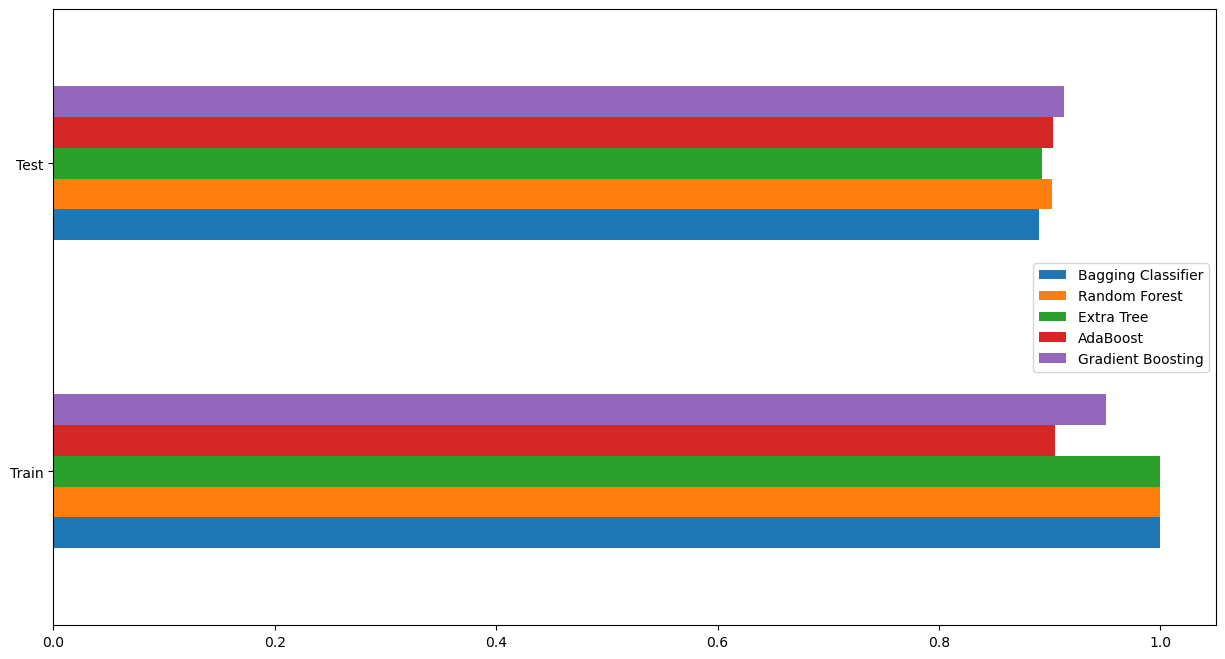

In [75]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))

In [91]:
X = df_resampled[['credit_score', 'gender', 'age', 'tenure', 'products_number', 'active_member', 'France', 'Germany']]
y = df_resampled[['churn']]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [95]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=2000)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)


C:\Users\Kush\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[5961  369]
 [ 837 5573]]
ACCURACY SCORE:
0.9053
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.876876     0.937900  0.905338      0.907388      0.907579
recall        0.941706     0.869423  0.905338      0.905564      0.905338
f1-score      0.908135     0.902364  0.905338      0.905250      0.905232
support    6330.000000  6410.000000  0.905338  12740.000000  12740.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1534   99]
 [ 203 1350]]
ACCURACY SCORE:
0.9052
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.883132     0.931677   0.90521     0.907404      0.906795
recall        0.939375     0.869285   0.90521     0.904330      0.905210
f1-score      0.910386     0.899400   0.90521     0.904893      0.905031
support    1633.000000  1553.000000   0.90521  3186.000000   3186.000000


In [33]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=2000)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)


C:\Users\Kush\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[6196  134]
 [ 520 5890]]
ACCURACY SCORE:
0.9487
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.922573     0.977756  0.948666      0.950164      0.950338
recall        0.978831     0.918877  0.948666      0.948854      0.948666
f1-score      0.949870     0.947402  0.948666      0.948636      0.948628
support    6330.000000  6410.000000  0.948666  12740.000000  12740.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1533  100]
 [ 206 1347]]
ACCURACY SCORE:
0.9040
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.881541     0.930891  0.903955     0.906216      0.905597
recall        0.938763     0.867354  0.903955     0.903058      0.903955
f1-score      0.909253     0.898000  0.903955     0.903626      0.903768
support    1633.000000  1553.000000  0.903955  3186.000000   3186.000000


In [144]:
name_new = []
accuracy_new = []
precision_new = []
recall_new = []
f1_new = []

## Random Forest

In [147]:
model_rf = RandomForestClassifier(max_depth=20,random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)


C:\Users\Kush\AppData\Local\Temp\ipykernel_11448\840241081.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)


In [148]:
name_new.append('Random Forest')
accuracy_new.append(accuracy_rf)
precision_new.append(f1_rf)
recall_new.append(precision_rf)
f1_new.append(recall_rf)

In [96]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_rf*100,precision_rf*100, recall_rf*100, f1_rf*100]}
df_rf = pd.DataFrame(measure)
df_rf

,Metric,Score
0,Accuracy,88.857502
1,Precision,90.472973
2,Recall,86.220219
3,F1 Score,88.295417


## Logistic Regression

In [145]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)


C:\Users\Kush\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [146]:
name_new.append('Logistic Regression')
accuracy_new.append(accuracy_lr)
precision_new.append(f1_lr)
recall_new.append(precision_lr)
f1_new.append(recall_lr)

In [99]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_lr*100,precision_lr*100, recall_lr*100, f1_lr*100]}
df_lr = pd.DataFrame(measure)
df_lr

,Metric,Score
0,Accuracy,79.629630
1,Precision,78.826531
2,Recall,79.587894
3,F1 Score,79.205383


## KNN

In [149]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

C:\Users\Kush\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [150]:
name_new.append('KNN')
accuracy_new.append(accuracy_knn)
precision_new.append(f1_knn)
recall_new.append(precision_knn)
f1_new.append(recall_knn)

In [121]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_knn*100,precision_knn*100, recall_knn*100, f1_knn*100]}
df_knn = pd.DataFrame(measure)
df_knn

,Metric,Score
0,Accuracy,83.961080
1,Precision,84.826203
2,Recall,81.712814
3,F1 Score,83.240407


## Naive Bayes

In [151]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_pred_gnb = model_gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)


C:\Users\Kush\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [152]:
name_new.append('GaussianNB')
accuracy_new.append(accuracy_gnb)
precision_new.append(f1_gnb)
recall_new.append(precision_gnb)
f1_new.append(recall_gnb)

In [124]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_gnb*100,precision_gnb*100, recall_gnb*100, f1_gnb*100]}
df_gnb = pd.DataFrame(measure)
df_gnb

,Metric,Score
0,Accuracy,80.853735
1,Precision,80.557356
2,Recall,80.038635
3,F1 Score,80.297158


## SVC

In [153]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)


C:\Users\Kush\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [154]:
name_new.append('SVC')
accuracy_new.append(accuracy_svc)
precision_new.append(f1_svc)
recall_new.append(precision_svc)
f1_new.append(recall_svc)

In [127]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_svc*100,precision_svc*100, recall_svc*100, f1_svc*100]}
df_svc = pd.DataFrame(measure)
df_svc

,Metric,Score
0,Accuracy,85.938481
1,Precision,87.920384
2,Recall,82.485512
3,F1 Score,85.116279


## Decision Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

dt_grid = GridSearchCV(dt, param_grid, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

y_pred_dt = best_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)


In [130]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_dt*100,precision_dt*100, recall_dt*100, f1_dt*100]}
df_dt = pd.DataFrame(measure)
df_dt

,Metric,Score
0,Accuracy,86.660389
1,Precision,87.600000
2,Recall,84.610431
3,F1 Score,86.079266


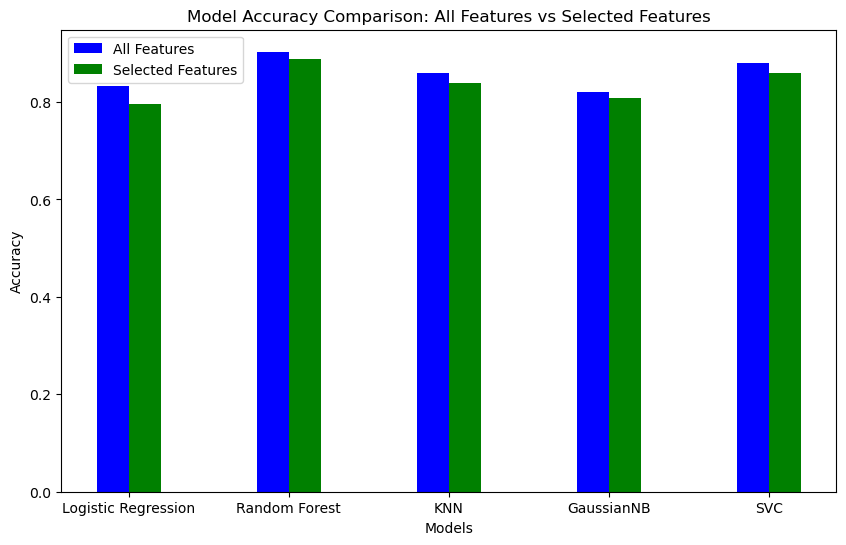

In [160]:
models = name_new
accuracy_all_features = accuracy  # Accuracies with all features
accuracy_selected_features = accuracy_new  # Accuracies with selected features

plt.figure(figsize=(10, 6))


x = range(len(models))
width = 0.2
plt.bar(x, accuracy_all_features, width=width, label='All Features', color='b', align='center')
plt.bar([i + width for i in x], accuracy_selected_features, width=width, label='Selected Features', color='g', align='center')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison: All Features vs Selected Features')
plt.xticks([i + width / 2 for i in x], models)

plt.legend()

plt.show()
